In [11]:
import numpy as np
import matplotlib.pyplot as plt

[[1.72090865 1.72111826 1.72132794 ... 2.22478395 2.22453369 2.22428348]
 [1.72106584 1.72127555 1.72148532 ... 2.22506397 2.22481354 2.22456315]
 [1.72122304 1.72143284 1.7216427  ... 2.22534409 2.22509348 2.22484292]
 ...
 [1.72122304 1.72143284 1.7216427  ... 2.22534409 2.22509348 2.22484292]
 [1.72106584 1.72127555 1.72148532 ... 2.22506397 2.22481354 2.22456315]
 [1.72090865 1.72111826 1.72132794 ... 2.22478395 2.22453369 2.22428348]]


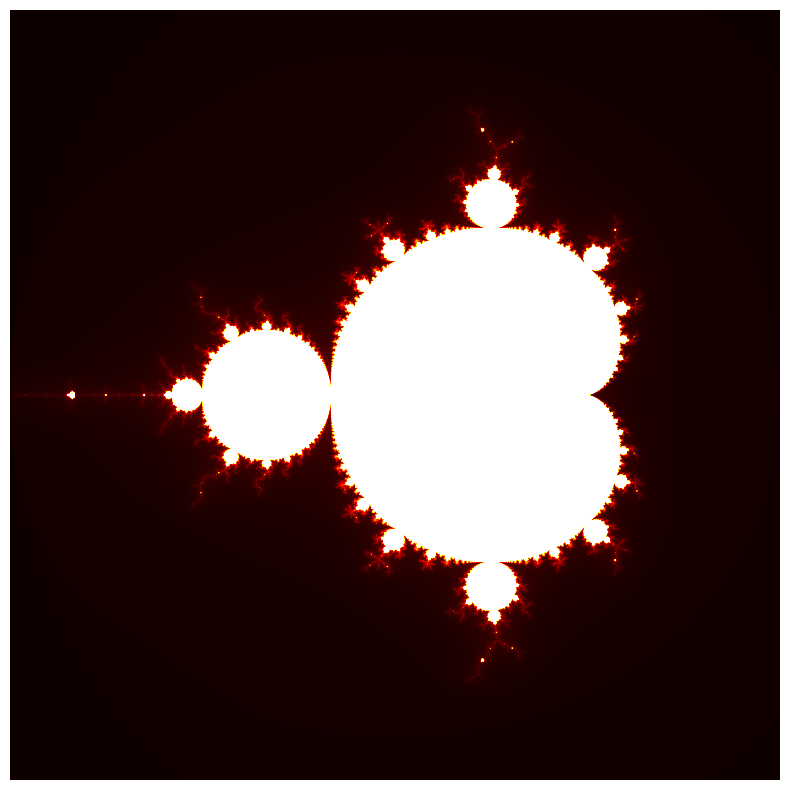

In [14]:
# Function to check if number is in mondelbrot set
def mandel_check(c, max_iter):
    limit = 0
    n = 0
    while abs(limit) <= 2 and n < max_iter:
        limit = limit*limit + c
        n += 1
    if n == max_iter: 
        return max_iter
    else: 
        #Gradient for picture
        return n + 1 - np.log(np.log2(abs(limit)))
# Drawing
width, height = 5000, 5000
x = np.linspace(-2, 1, width)
y = np.linspace(-1.5, 1.5, height)
mandelbrot_image = np.array([[mandel_check(x[ix] + 1j*y[iy], 300) for ix in range(width)] for iy in range(height)])
print(mandelbrot_image)
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot_image, extent=[-2, 1, -1.5, 1.5], cmap='hot', vmin=0, vmax=200 + 1)
plt.axis('off')
plt.show()


In [15]:
from joblib import Parallel, delayed
import numpy as np

In [16]:
# Not parallel
def area_mandel(n_sampl, max_iter):
    x_min = -2
    x_max = 1
    y_min = -1.5
    y_max = 1.5
    sampler = 0
    hit = 0
    while sampler < n_sampl:
        # Sample
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        sampler += 1
        c = x + 1j*y
        #check
        cheker = mandel_check(c, max_iter)
        if cheker == max_iter:
            hit +=1
    area = (x_max - x_min)*(y_max - y_min) * (hit/sampler)
    return area


print(area_mandel(10**6, 500))
        
    

1.511631


In [17]:
from joblib import Parallel, delayed
import numpy as np

In [18]:
def mandel_check(c, max_iter):
    limit = 0
    n = 0
    while abs(limit) <= 2 and n < max_iter:
        limit = limit*limit + c
        n += 1
    if n == max_iter: 
        return max_iter
    else: 
        return n + 1 - np.log(np.log2(abs(limit)))
    
def area_mandel(n_sampl, max_iter):
    x_min = -2
    x_max = 1
    y_min = -1.5
    y_max = 1.5
    sampler = 0
    hit = 0
    while sampler < n_sampl:
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        sampler += 1
        c = x + 1j*y
        cheker = mandel_check(c, max_iter)
        if cheker == max_iter:
            hit +=1
    return hit, sampler

total_samples = 10**6
max_iter = 500
num_cores = 10 # Number of CPU cores to use 
samples_per_core = total_samples // num_cores
#Execute
results = Parallel(n_jobs=num_cores)(
    delayed(area_mandel)(samples_per_core, max_iter) for core in range(num_cores)
)
# Connect
hits = sum(hit for hit, _ in results)
samples = sum(sampler for _, sampler in results)
x_min, x_max = -2, 1
y_min, y_max = -1.5, 1.5
area = (x_max - x_min)*(y_max - y_min) * (hits / samples)
print(area)

    

1.517436
